## Chemical words

This fun little project aims to transform a string of characters into "chemical encoding", similarly to how the "**Br**eaking **Ba**d" show name is spelled out with Bromine (element 35) and Barium (element 56).

<img src="breaking_bad_picture.jpg" width=700/>
<caption><center> <u> <font color='purple'> <b>Breaking Bad (TV Series 2008-2013)</b> </u></center></caption>

It is way to easy to just pick some chemical symbols from the word. Our goal is to transform the whole word into a sequence of chemical symbols. This is not possible for every word, so I propose to call such words "*chemical words*". We will search for all possible combinations in each word (for example the word "rain" can be represented in two ways -- \['RaIn', 'RaIN'\], first one being (Radium, Indium) and second one being (Radium, Iodine, Nitrogen).

In [1]:
# first get all the chemical symbols of elements into a list

import pandas as pd
df = pd.read_html("https://www.vedantu.com/chemistry/118-elements-and-their-symbols-and-atomic-numbers")[0]
elements = [str(x).lower() for x in df[2]][1:]

In [2]:
print(elements)
print(f"\nThere are {len(elements)} known chemical elements in total.")

['h', 'he', 'li', 'be', 'b', 'c', 'n', 'o', 'f', 'ne', 'na', 'mg', 'al', 'si', 'p', 's', 'cl', 'ar', 'k', 'ca', 'sc', 'ti', 'v', 'cr', 'mn', 'fe', 'co', 'ni', 'cu', 'zn', 'ga', 'ge', 'as', 'se', 'br', 'kr', 'rb', 'sr', 'y', 'zr', 'nb', 'mo', 'tc', 'ru', 'rh', 'pd', 'ag', 'cd', 'in', 'sn', 'sb', 'te', 'i', 'xe', 'cs', 'ba', 'la', 'ce', 'pr', 'nd', 'pm', 'sm', 'eu', 'gd', 'tb', 'dy', 'ho', 'er', 'tm', 'yb', 'lu', 'hf', 'ta', 'w', 're', 'os', 'ir', 'pt', 'au', 'hg', 'tl', 'pb', 'bi', 'po', 'at', 'rn', 'fr', 'ra', 'ac', 'th', 'pa', 'u', 'np', 'pu', 'am', 'cm', 'bk', 'cf', 'es', 'fm', 'md', 'no', 'lr', 'rf', 'db', 'sg', 'bh', 'hs', 'mt', 'ds', 'rg', 'cn', 'nh', 'fl', 'mc', 'lv', 'ts', 'og']

There are 118 known chemical elements in total.


In [3]:
n_one_letter = sum([len(x)==1 for x in elements])
n_two_letter = sum([len(x)==2 for x in elements])
print(f"There are {n_one_letter} one-letter symbols and {n_two_letter} two-letter symbols.")

There are 14 one-letter symbols and 104 two-letter symbols.



As we can see, they are at most 2 letters in length, and there are 118 of them. Interestingly, only 14 elements get abbreviated as a single letter of english alphabet (out of 26 available). Let's list them:

In [4]:
[x.capitalize() for x in elements if len(x)==1]

['H', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'K', 'V', 'Y', 'I', 'W', 'U']

As for the remaining unused letters of the alphabet, here they are: ['A','D','E','G','J','L','M','Q','R','T','X','Z']. However, some of them appear in the two-letter combinations (A in Al, or E in Es, for example). Let's check, if some of the letters are completely missing:

In [5]:
used_letters = set("".join(elements).upper())
alphabet = set("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
print(f"Letters {alphabet - used_letters} are completely missing from the names of chemical symbols!") 

Letters {'Q', 'J'} are completely missing from the names of chemical symbols!


That's a bummer! This means, that if your name contains letters 'J' or 'Q', it is not *chemical* and cannot be written as a combination of chemical symbols. I'm sorry :(

## Function to get chemical representation

We will now attempt to write a function, that takes a word as a string and returns it's chemical analog. This function will first try to match for the two-letter symbols, to make the result more interesting

In [6]:
def get_chemical_word(word: str) -> str:
    """
    Arguments:
    word -- (str) of alphabetical characters
    
    Returns:
    result -- (str) chemical representations of a given word in CamelCase.
    Empty string is returned, if it is not possible to construct a given 
    word from the chemical symbols
    """
    
    word_len = len(word)
    result = ""
    while word != "":
        new_el = ""
        if word[:2] in elements:
            new_el = word[:2]
            word = word[2:]
        elif word[:1] in elements:
            new_el = word[:1]
            word = word[1:]
        else:
            break
        result += new_el.capitalize()

    if len(result) != word_len:
        result = ""
        
    return result

Let's now try a few words!

In [7]:
words = ["neptune","confrontation","hamburger","southwestern"]
for word in words:
    print(f"{word} --> {get_chemical_word(word)}")


neptune --> NePtUNe
confrontation --> CoNFrONTaTiON
hamburger --> HAmBURgEr
southwestern --> SOUThWEsTeRn


As we can see, even pretty long words can be represented as sequences of chemical elements symbols. Wouldn't it be interesting to find the longest ones? If you are using linux, there is a file `/usr/share/dict/american-english`, that contains about 100'000 most commonly used english words. We have a copy of it in this folder.

In [14]:
# we first read this file into a string and then split it into a list of words

with open("./american-english") as f:
    dictionary = f.read()

# get everything to lower register and remove trailing 's
words = [w.lower() for w in dictionary.split() if w[-2:] != "'s"]
print(f"There are {len(words)} words and the longest one is {max([len(w) for w in words])} characters!")

There are 73381 words and the longest one is 22 characters!


In [15]:
elemental_words = []

for w in words:
    w_from_el = get_chemical_word(w)
    if w_from_el != "":
        print(f"{w:<20} --> {w_from_el:<23}")
        elemental_words.append(w_from_el)

ac                   --> Ac                     
achebe               --> AcHeBe                 
achernar             --> AcHeRnAr               
acheson              --> AcHeSON                
acosta               --> AcOsTa                 
acts                 --> AcTs                   
acuff                --> AcUFF                  
ag                   --> Ag                     
agassi               --> AgAsSi                 
agnes                --> AgNeS                  
agnew                --> AgNeW                  
agni                 --> AgNi                   
agra                 --> AgRa                   
aguirre              --> AgUIrRe                
agustin              --> AgUSTiN                
al                   --> Al                     
alamo                --> AlAmO                  
alar                 --> AlAr                   
alaric               --> AlArIC                 
alba                 --> AlBa                   
albany              

smirnoff             --> SmIrNoFF               
smith                --> SmITh                  
smithson             --> SmIThSON               
smuts                --> SmUTs                  
sn                   --> Sn                     
snickers             --> SnICKErS               
snoopy               --> SnOOPY                 
snow                 --> SnOW                   
socrates             --> SOCrAtEs               
socratic             --> SOCrAtIC               
soho                 --> SOHo                   
solis                --> SOLiS                  
son                  --> SON                    
sondra               --> SONdRa                 
sonny                --> SONNY                  
sony                 --> SONY                   
sophocles            --> SOPHoClEs              
sopwith              --> SOPWITh                
sorbonne             --> SORbONNe               
south                --> SOUTh                  
southampton         

blindness            --> BLiNdNeSS              
blinds               --> BLiNdS                 
blink                --> BLiNK                  
blinker              --> BLiNKEr                
blinkers             --> BLiNKErS               
blinks               --> BLiNKS                 
blip                 --> BLiP                   
blips                --> BLiPS                  
bliss                --> BLiSS                  
blither              --> BLiThEr                
bluer                --> BLuEr                  
blues                --> BLuEs                  
bluff                --> BLuFF                  
bluffs               --> BLuFFS                 
bluish               --> BLuISH                 
blunder              --> BLuNdEr                
blunderbuss          --> BLuNdErBUSS            
blunderbusses        --> BLuNdErBUSSeS          
blunderer            --> BLuNdErEr              
blunderers           --> BLuNdErErS             
blunders            

confection           --> CoNFeCTiON             
confections          --> CoNFeCTiONS            
conference           --> CoNFeReNCe             
conferences          --> CoNFeReNCeS            
confess              --> CoNFeSS                
confesses            --> CoNFeSSeS              
confession           --> CoNFeSSiON             
confessions          --> CoNFeSSiONS            
confines             --> CoNFInEs               
confiscates          --> CoNFIScAtEs            
confiscation         --> CoNFIScAtION           
confiscations        --> CoNFIScAtIONS          
conflagration        --> CoNFlAgRaTiON          
conflagrations       --> CoNFlAgRaTiONS         
conflicts            --> CoNFlICTs              
confound             --> CoNFOUNd               
confounds            --> CoNFOUNdS              
confrontation        --> CoNFrONTaTiON          
confrontations       --> CoNFrONTaTiONS         
confronts            --> CoNFrONTs              
confuse             

frothier             --> FrOThIEr               
froths               --> FrOThS                 
frothy               --> FrOThY                 
frown                --> FrOWN                  
frowns               --> FrOWNS                 
frowsier             --> FrOWSiEr               
frowsy               --> FrOWSY                 
fructifies           --> FrUCTiFIEs             
fructify             --> FrUCTiFY               
fruitier             --> FrUITiEr               
fruition             --> FrUITiON               
fruitless            --> FrUITlEsS              
fruitlessness        --> FrUITlEsSnEsS          
fruits               --> FrUITs                 
fry                  --> FrY                    
fryer                --> FrYEr                  
fryers               --> FrYErS                 
fuchsias             --> FUCHsIAs               
fuck                 --> FUCK                   
fucker               --> FUCKEr                 
fuckers             

iron                 --> IrON                   
ironic               --> IrONiC                 
ironies              --> IrONiEs                
irons                --> IrONS                  
irony                --> IrONY                  
irresolute           --> IrReSOLuTe             
irresolution         --> IrReSOLuTiON           
irruption            --> IrRuPtION              
irruptions           --> IrRuPtIONS             
is                   --> IS                     
island               --> ISLaNd                 
islander             --> ISLaNdEr               
islanders            --> ISLaNdErS              
islands              --> ISLaNdS                
ism                  --> ISm                    
isms                 --> ISmS                   
isolate              --> ISOLaTe                
isolates             --> ISOLaTeS               
isolation            --> ISOLaTiON              
isolationism         --> ISOLaTiONiSm           
isolationists       

packs                --> PaCKS                  
pacts                --> PaCTs                  
pads                 --> PaDs                   
pagan                --> PaGaN                  
paganism             --> PaGaNiSm               
pagans               --> PaGaNS                 
page                 --> PaGe                   
pages                --> PaGeS                  
pain                 --> PaIn                   
pains                --> PaInS                  
paintbrush           --> PaInTbRuSH             
paintbrushes         --> PaInTbRuSHeS           
paints               --> PaInTs                 
pair                 --> PaIr                   
pairs                --> PaIrS                  
pairwise             --> PaIrWISe               
palace               --> PaLaCe                 
palaces              --> PaLaCeS                
palate               --> PaLaTe                 
palates              --> PaLaTeS                
palatial            

puffin               --> PuFFIn                 
puffiness            --> PuFFInEsS              
puffins              --> PuFFInS                
puffs                --> PuFFS                  
puffy                --> PuFFY                  
pukes                --> PuKEs                  
pun                  --> PuN                    
punch                --> PuNCH                  
punches              --> PuNCHeS                
punchier             --> PuNCHIEr               
punchline            --> PuNCHLiNe              
punchy               --> PuNCHY                 
punctilious          --> PuNCTiLiOUS            
pundits              --> PuNdITs                
pungency             --> PuNGeNCY               
pungently            --> PuNGeNTlY              
punier               --> PuNiEr                 
punish               --> PuNiSH                 
punishes             --> PuNiSHeS               
punk                 --> PuNK                   
punker              

scurfy               --> ScURfY                 
scythes              --> ScYThEs                
seacoasts            --> SeAcOAsTs              
seal                 --> SeAl                   
sealer               --> SeAlEr                 
sealers              --> SeAlErS                
seals                --> SeAlS                  
sealskin             --> SeAlSKIn               
seam                 --> SeAm                   
seamier              --> SeAmIEr                
seams                --> SeAmS                  
seamy                --> SeAmY                  
sear                 --> SeAr                   
search               --> SeArCH                 
searches             --> SeArCHeS               
sears                --> SeArS                  
seas                 --> SeAs                   
seascapes            --> SeAsCaPEs              
seashore             --> SeAsHoRe               
seashores            --> SeAsHoReS              
seasick             

suffocation          --> SUFFOCaTiON            
suffragists          --> SUFFrAgISTs            
suffuse              --> SUFFUSe                
suffuses             --> SUFFUSeS               
suffusion            --> SUFFUSiON              
suitcases            --> SUITcAsEs              
suite                --> SUITe                  
suites               --> SUITeS                 
suits                --> SUITs                  
sumo                 --> SUMo                   
sun                  --> SUN                    
sunbathe             --> SUNbAtHe               
sunbathes            --> SUNbAtHeS              
sunbonnets           --> SUNbONNeTs             
sunburn              --> SUNbURn                
sunburns             --> SUNbURnS               
sunder               --> SUNdEr                 
sunders              --> SUNdErS                
sundial              --> SUNdIAl                
sundials             --> SUNdIAlS               
sundown             

whether              --> WHeThEr                
whets                --> WHeTs                  
whew                 --> WHeW                   
whey                 --> WHeY                   
which                --> WHICH                  
whichever            --> WHICHeVEr              
whiff                --> WHIFF                  
whiffs               --> WHIFFS                 
whiner               --> WHInEr                 
whiners              --> WHInErS                
whines               --> WHInEs                 
whinier              --> WHInIEr                
whinnies             --> WHInNiEs               
whinny               --> WHInNY                 
whiny                --> WHInY                  
whip                 --> WHIP                   
whiplash             --> WHIPLaSH               
whiplashes           --> WHIPLaSHeS             
whips                --> WHIPS                  
whir                 --> WHIr                   
whirs               

How many do we got?

In [16]:
print(len(elemental_words))

10594


Great! So, there is roughly 1 in 10 chance that a given english word can be written in a chemical way! Let's find the longest!

In [18]:
longest_index = [len(w) for w in elemental_words].index(max([len(w) for w in elemental_words]))

print(elemental_words[longest_index], len(elemental_words[longest_index]))

CoNVErSAtIONaLiSTs 18


So, the word "CoNVErSAtIONaLiSTs" wins!

## Getting all possible representations

Actually, our analysis was not entirely correct. Remember, the algorithm first checks for the two-letter symbols and if it finds a match, tries to process the remaining part of the word. But it could happen, that a combination that starts with a one-letter symbol is valid. For example, our algorithm would fail to find a representation to "cal", since "Ca" exists, but "L" is not a valid chemical symbol. But "cal" could easily be written as "CAl". We can fix this, using a technique called backtracking.

In [57]:
def get_all_chemical_repr_of_word(word: str):
    """
    Arguments:
    word -- (str) input string of characters
    w_orig
    Returns:
    result -- a list of strings, containing every
    chemical representation of a given word
    """
    def elemental_word(w, w_orig, res='', sol=[]):
        # if res string has the same length as an original word, append 
        # to the solutions list
        if len(res) == len(w_orig):
            sol.append(res)

        # split the word in two ways to check 
        prefix_1, suffix_1 = w[:1].lower(), w[1:].lower()
        prefix_2, suffix_2 = w[:2].lower(), w[2:].lower()
        
        # call the function recursively for both cases, adding to the res
        if prefix_1 in elements:
            elemental_word(suffix_1, w_orig, res + prefix_1.capitalize(), sol)
        if prefix_2 in elements:
            elemental_word(suffix_2, w_orig, res + prefix_2.capitalize(), sol)

        return list(set(sol))

    word = word.lower()
    return elemental_word(word,word)

We are now able to find all possible representations for every word! Now, let's search for the longest words, and for the words with the largest amount of representations.

In [58]:
word_to_el_repr = {}
for w in words:
    sol = get_all_chemical_repr_of_word(w)
    if len(sol) > 0:
        word_to_el_repr[w] = sol

In [59]:
for word, list_of_representations in word_to_el_repr.items():
    if len(word)>=19:
        print(f"{word:>20} --> {list_of_representations}\n")

 nonrepresentational --> ['NoNRePReSeNTaTiONAl', 'NONRePReSeNTaTiONAl']



That's interesting! The longest word is not actually "CoNVErSAtIONaLiSTs", but "NoNRePReSeNTaTiONAl", and it's **19** letters long!

In [60]:
for word, list_of_representations in word_to_el_repr.items():
    if len(list_of_representations)>=20:
        print(f"{word:>20} --> {list_of_representations}\n")

          concubines --> ['CoNCUBInEs', 'CoNCuBiNEs', 'CoNCUBINEs', 'CoNCUBINeS', 'CONCuBiNEs', 'CONCUBInEs', 'CONCUBiNeS', 'CONCUBINEs', 'CoNCuBInEs', 'CONCuBiNeS', 'CONCuBINEs', 'CONCuBInEs', 'CONCUBINeS', 'CoNCUBiNEs', 'CoNCUBiNeS', 'CoNCuBINEs', 'CoNCuBINeS', 'CONCUBiNEs', 'CoNCuBiNeS', 'CONCuBINeS']

     consciousnesses --> ['CONScIOUSNeSSeS', 'CONSCIOUSnEsSEs', 'CoNSCIOUSNEsSeS', 'CoNSCIOUSNeSSeS', 'CONSCIOUSNEsSeS', 'CONSCIOUSNeSSeS', 'CoNScIOUSNeSSeS', 'CONScIOUSnEsSEs', 'CoNSCIOUSnEsSEs', 'CoNScIOUSNEsSeS', 'CONScIOUSNEsSeS', 'CoNScIOUSNeSSEs', 'CoNScIOUSnEsSeS', 'CoNScIOUSNEsSEs', 'CoNScIOUSnEsSEs', 'CONScIOUSNeSSEs', 'CoNSCIOUSNEsSEs', 'CONSCIOUSnEsSeS', 'CONSCIOUSNeSSEs', 'CONSCIOUSNEsSEs', 'CoNSCIOUSNeSSEs', 'CoNSCIOUSnEsSeS', 'CONScIOUSNEsSEs', 'CONScIOUSnEsSeS']

   inconspicuousness --> ['InCONSPICuOUSNEsS', 'INCoNSPICuOUSnEsS', 'InCONSPICUOUSNeSS', 'INCoNSPICUOUSNeSS', 'InCoNSPICuOUSnEsS', 'INCONSPICUOUSNeSS', 'InCONSPICuOUSNeSS', 'INCONSPICuOUSNeSS', 'INCONSPICUOUSnE

And these are the words with the highest number of ways in which they can be written. The word "concubines" (in Judaism, a concubine is a marital companion of inferior status to a wife) can be written in 20 different ways! And there is also clerly a pattern going on with "cuous" and " cons" letter combinations that help this words achieve a record.

We will now plot a distribution of the amount of representations

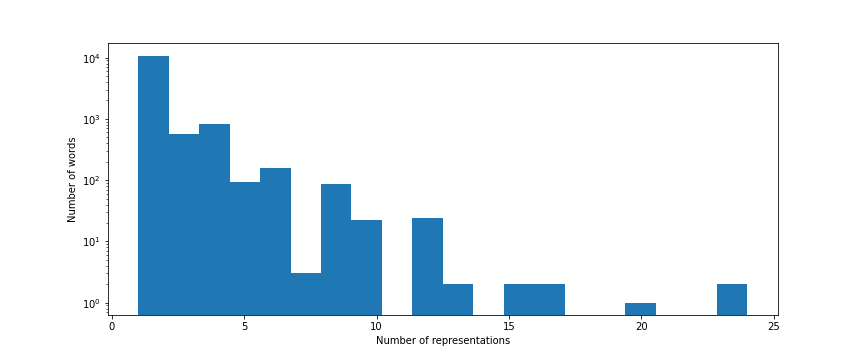

In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget 

n_repr = [len(r) for w, r in word_to_el_repr.items()]

counts, bins = np.histogram(n_repr, bins=20)
plt.figure(figsize=(12,5))
plt.clf()
plt.hist(bins[:-1], bins, weights=counts)
plt.yscale('log')
plt.xlabel("Number of representations")
plt.ylabel("Number of words")
plt.show()

## Wrap-up

Thanks for reading till the end! I hope you enjoyed this notebook and learned something new! Please, play around with it, put in your name (or name of your cat) and see, how it can be written as chemical symbols.